# WeatherPy


### Analysis

* #### Observed Trend 1

    While latitudes 10 through 30 had the highest number of cities reporting no cloud cover, there appears to be no tendency for
    clouds to favor any particular geographic area.


* #### Observed Trend 2

    The temperature clearly rises as you approach the equator in the Northern Hemishpere but this trend isn't as apparent in the
    Southern Hemishpere.  This is due to the fact that when the data was pulled (4/1/2018), it was summer in the Southern
    Hemishpere meaning there was more direct sunlight, making the gradual increase in temperature when moving towards the
    equator less significant.


* #### Observed Trend 3

    The cities randomly selected were relatively calm from a wind standpoint.  Of the 500 cities, only 3 of them (0.6%) reported     wind speeds in excess of 25 miles per hour when queried.

In [79]:
# Import Dependencies
import numpy as np
import pandas as pd
import requests as req
import time as time
import matplotlib.pyplot as plt
import os
import json
from citipy import citipy
%matplotlib inline

In [80]:
# Google Places API Key
#api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))))
#file_name = os.path.join(api_dir, "Bootcamp", "api_keys.json")
#data = json.load(open(file_name))
#gkey = data['open_weather_map_api_key2']

In [81]:
#api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))))
#file_name = os.path.join(api_dir, "api_keys.json")
#data = json.load(open(file_name))
file_name = "C:\KUBootCamp\\api_keys.json"
data = json.load(open(file_name))
consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']
gkey = data['openweathermap_api_key']

In [82]:


#print(gkey)

### Obtain Random Coordinate Pairs

In [114]:
# startingNum is number of cities to process to get 500 finalNum sample
startingNum = 1500
finalNum = 500

#get report date
rDate = pd.to_datetime('today')

print(rDate)

2018-03-31 00:00:00


In [84]:
lat = []
lng = []


In [85]:
np.random.seed(20180331)
for x in range(startingNum):
    lat.append(np.random.uniform(-90,90))
    lng.append(np.random.uniform(-180,180))

In [86]:
df = pd.DataFrame(data=[lat, lng], copy=True)

In [87]:
df = df.T

df.columns = ("lat", "lng")
df.lat = df.lat.round(2)
df.lng = df.lng.round(2)

In [88]:
df['city'] = ""
df['country'] = ""
df['date'] = ""
df['temp_max'] = ""
df['humidity'] = ""
df['wind_speed'] = ""
df['cloudiness'] = ""

### Generate Cities List

In [89]:
for index, row in df.iterrows():
    city = citipy.nearest_city(row['lat'], row['lng'])
    df.set_value(index,'city',city.city_name)

In [90]:
len(df)

1500

### Perform API Calls

In [91]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={gkey}&q=london"
response = req.get(url)
print(response.status_code)

200


In [92]:
counter = 0
print('Beginning Data Retrieval')
print('----------------------------------------------------------')
for index, row in df.iterrows():
    my_city = (row['city'].replace(" ", "%20"))
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={gkey}&q={my_city}"
    
    print(f"Processing City Number: {counter} | {row['city']}")
    print(url)
    print('----------------------------------------------------------')
        
    try:
        info = req.get(url).json()
        temperature_data = (info['main']['temp_max'])
        humidity_data = (info['main']['humidity'])
        wind_speed_data = (info['wind']['speed'])
        cloud_data = (info['clouds']['all'])
        country_data = (info['sys']['country'])
        date1 = (info['dt'])

        df.set_value(index,'temp_max',temperature_data)
        df.set_value(index,'humidity',humidity_data)
        df.set_value(index,'wind_speed',wind_speed_data)
        df.set_value(index,'cloudiness',cloud_data)
        df.set_value(index,'country',country_data)
        df.set_value(index,'date',date1)

    except Exception as e:
        print(f"{row['city']} was skipped")
        print("----------------------")

    counter = counter + 1

Beginning Data Retrieval
----------------------------------------------------------
Processing City Number: 0 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=hermanus
----------------------------------------------------------
Processing City Number: 1 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=ponta%20do%20sol
----------------------------------------------------------
Processing City Number: 2 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=illoqqortoormiut
----------------------------------------------------------
illoqqortoormiut was skipped
----------------------
Processing City Number: 3 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=hilo
----------------------------------------------------------
Processing C

Processing City Number: 39 | omsukchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=omsukchan
----------------------------------------------------------
Processing City Number: 40 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=mataura
----------------------------------------------------------
Processing City Number: 41 | gubkinskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=gubkinskiy
----------------------------------------------------------
Processing City Number: 42 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=longyearbyen
----------------------------------------------------------
Processing City Number: 43 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=punta%2

Processing City Number: 78 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=provideniya
----------------------------------------------------------
Processing City Number: 79 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=rikitea
----------------------------------------------------------
Processing City Number: 80 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=port%20elizabeth
----------------------------------------------------------
Processing City Number: 81 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=east%20london
----------------------------------------------------------
Processing City Number: 82 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&

Processing City Number: 118 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=victoria
----------------------------------------------------------
Processing City Number: 119 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=punta%20arenas
----------------------------------------------------------
Processing City Number: 120 | kuznechnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=kuznechnoye
----------------------------------------------------------
Processing City Number: 121 | pokrovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=pokrovsk
----------------------------------------------------------
Processing City Number: 122 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=be

Processing City Number: 158 | mentok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=mentok
----------------------------------------------------------
mentok was skipped
----------------------
Processing City Number: 159 | pingliang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=pingliang
----------------------------------------------------------
Processing City Number: 160 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=narsaq
----------------------------------------------------------
Processing City Number: 161 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=komsomolskiy
----------------------------------------------------------
Processing City Number: 162 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f3656

Processing City Number: 197 | port hawkesbury
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=port%20hawkesbury
----------------------------------------------------------
Processing City Number: 198 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=ilulissat
----------------------------------------------------------
Processing City Number: 199 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=hithadhoo
----------------------------------------------------------
Processing City Number: 200 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=ushuaia
----------------------------------------------------------
Processing City Number: 201 | kenai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=ken

Processing City Number: 237 | cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=cabedelo
----------------------------------------------------------
Processing City Number: 238 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=esperance
----------------------------------------------------------
Processing City Number: 239 | sakakah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=sakakah
----------------------------------------------------------
sakakah was skipped
----------------------
Processing City Number: 240 | shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=shingu
----------------------------------------------------------
Processing City Number: 241 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f3656440

Processing City Number: 275 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=sentyabrskiy
----------------------------------------------------------
sentyabrskiy was skipped
----------------------
Processing City Number: 276 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=ushuaia
----------------------------------------------------------
Processing City Number: 277 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=ushuaia
----------------------------------------------------------
Processing City Number: 278 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=komsomolskiy
----------------------------------------------------------
Processing City Number: 279 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing City Number: 314 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=castro
----------------------------------------------------------
Processing City Number: 315 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=ushuaia
----------------------------------------------------------
Processing City Number: 316 | olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=olafsvik
----------------------------------------------------------
olafsvik was skipped
----------------------
Processing City Number: 317 | baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=baykit
----------------------------------------------------------
Processing City Number: 318 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31

Processing City Number: 352 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=mar%20del%20plata
----------------------------------------------------------
Processing City Number: 353 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=georgetown
----------------------------------------------------------
Processing City Number: 354 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=cape%20town
----------------------------------------------------------
Processing City Number: 355 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=illoqqortoormiut
----------------------------------------------------------
illoqqortoormiut was skipped
----------------------
Processing City Number: 356 | georgetown
http://api.openweathermap.org

Processing City Number: 390 | abapo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=abapo
----------------------------------------------------------
Processing City Number: 391 | muddebihal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=muddebihal
----------------------------------------------------------
Processing City Number: 392 | tadine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=tadine
----------------------------------------------------------
Processing City Number: 393 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=norman%20wells
----------------------------------------------------------
Processing City Number: 394 | nadym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=nadym
-----------

Processing City Number: 430 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=mataura
----------------------------------------------------------
Processing City Number: 431 | olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=olafsvik
----------------------------------------------------------
olafsvik was skipped
----------------------
Processing City Number: 432 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=georgetown
----------------------------------------------------------
Processing City Number: 433 | grandview
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=grandview
----------------------------------------------------------
Processing City Number: 434 | bayangol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00

Processing City Number: 468 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=hermanus
----------------------------------------------------------
Processing City Number: 469 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=rikitea
----------------------------------------------------------
Processing City Number: 470 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=grindavik
----------------------------------------------------------
Processing City Number: 471 | safwah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=safwah
----------------------------------------------------------
safwah was skipped
----------------------
Processing City Number: 472 | griffith
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037

Processing City Number: 508 | khonuu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=khonuu
----------------------------------------------------------
khonuu was skipped
----------------------
Processing City Number: 509 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=victoria
----------------------------------------------------------
Processing City Number: 510 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=punta%20arenas
----------------------------------------------------------
Processing City Number: 511 | sergeyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=sergeyevka
----------------------------------------------------------
Processing City Number: 512 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6

----------------------------------------------------------
artyk was skipped
----------------------
Processing City Number: 547 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=chokurdakh
----------------------------------------------------------
Processing City Number: 548 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=palabuhanratu
----------------------------------------------------------
palabuhanratu was skipped
----------------------
Processing City Number: 549 | parana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=parana
----------------------------------------------------------
Processing City Number: 550 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=vaini
----------------------------------------------------------
Process

dibaya was skipped
----------------------
Processing City Number: 587 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=rikitea
----------------------------------------------------------
Processing City Number: 588 | talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=talnakh
----------------------------------------------------------
Processing City Number: 589 | chiang khong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=chiang%20khong
----------------------------------------------------------
Processing City Number: 590 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=new%20norfolk
----------------------------------------------------------
Processing City Number: 591 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing City Number: 627 | vaitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=vaitape
----------------------------------------------------------
Processing City Number: 628 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=faanui
----------------------------------------------------------
Processing City Number: 629 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=punta%20arenas
----------------------------------------------------------
Processing City Number: 630 | pochutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=pochutla
----------------------------------------------------------
Processing City Number: 631 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=cape%20town
-

Processing City Number: 667 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=port%20elizabeth
----------------------------------------------------------
Processing City Number: 668 | carlsbad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=carlsbad
----------------------------------------------------------
Processing City Number: 669 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=busselton
----------------------------------------------------------
Processing City Number: 670 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=rikitea
----------------------------------------------------------
Processing City Number: 671 | juntas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=juntas

Processing City Number: 706 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=saldanha
----------------------------------------------------------
Processing City Number: 707 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=kodiak
----------------------------------------------------------
Processing City Number: 708 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=victoria
----------------------------------------------------------
Processing City Number: 709 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=puerto%20ayora
----------------------------------------------------------
Processing City Number: 710 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=narsaq
-------

Processing City Number: 746 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=rikitea
----------------------------------------------------------
Processing City Number: 747 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=taolanaro
----------------------------------------------------------
taolanaro was skipped
----------------------
Processing City Number: 748 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=hermanus
----------------------------------------------------------
Processing City Number: 749 | takaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=takaka
----------------------------------------------------------
Processing City Number: 750 | carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f3656

Processing City Number: 784 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=busselton
----------------------------------------------------------
Processing City Number: 785 | puri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=puri
----------------------------------------------------------
Processing City Number: 786 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=codrington
----------------------------------------------------------
Processing City Number: 787 | shimanovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=shimanovsk
----------------------------------------------------------
Processing City Number: 788 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=taolanaro
-----

Processing City Number: 823 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=rikitea
----------------------------------------------------------
Processing City Number: 824 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=guerrero%20negro
----------------------------------------------------------
Processing City Number: 825 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=illoqqortoormiut
----------------------------------------------------------
illoqqortoormiut was skipped
----------------------
Processing City Number: 826 | port arthur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=port%20arthur
----------------------------------------------------------
Processing City Number: 827 | kabelvag
http://api.openweathermap.org/dat

Processing City Number: 861 | marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=marawi
----------------------------------------------------------
Processing City Number: 862 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=chuy
----------------------------------------------------------
Processing City Number: 863 | bakchar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=bakchar
----------------------------------------------------------
Processing City Number: 864 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=kaitangata
----------------------------------------------------------
Processing City Number: 865 | dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=dunedin
---------------------

Processing City Number: 902 | galgani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=galgani
----------------------------------------------------------
galgani was skipped
----------------------
Processing City Number: 903 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=butaritari
----------------------------------------------------------
Processing City Number: 904 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=la%20ronge
----------------------------------------------------------
Processing City Number: 905 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=bethel
----------------------------------------------------------
Processing City Number: 906 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f36564403

Processing City Number: 941 | saint simons
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=saint%20simons
----------------------------------------------------------
Processing City Number: 942 | corinto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=corinto
----------------------------------------------------------
Processing City Number: 943 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=butaritari
----------------------------------------------------------
Processing City Number: 944 | rio de janeiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=rio%20de%20janeiro
----------------------------------------------------------
Processing City Number: 945 | ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f

Processing City Number: 980 | belvedere marittimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=belvedere%20marittimo
----------------------------------------------------------
Processing City Number: 981 | aktau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=aktau
----------------------------------------------------------
Processing City Number: 982 | bidhuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=bidhuna
----------------------------------------------------------
Processing City Number: 983 | linhares
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=linhares
----------------------------------------------------------
Processing City Number: 984 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=sitka

Processing City Number: 1020 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=hermanus
----------------------------------------------------------
Processing City Number: 1021 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=sentyabrskiy
----------------------------------------------------------
sentyabrskiy was skipped
----------------------
Processing City Number: 1022 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=castro
----------------------------------------------------------
Processing City Number: 1023 | akdagmadeni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=akdagmadeni
----------------------------------------------------------
Processing City Number: 1024 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing City Number: 1058 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=iqaluit
----------------------------------------------------------
Processing City Number: 1059 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=kruisfontein
----------------------------------------------------------
Processing City Number: 1060 | mersing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=mersing
----------------------------------------------------------
Processing City Number: 1061 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=hithadhoo
----------------------------------------------------------
Processing City Number: 1062 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=qaanaaq


Processing City Number: 1097 | san vicente de canete
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=san%20vicente%20de%20canete
----------------------------------------------------------
Processing City Number: 1098 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=mataura
----------------------------------------------------------
Processing City Number: 1099 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=sao%20filipe
----------------------------------------------------------
Processing City Number: 1100 | sechura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=sechura
----------------------------------------------------------
Processing City Number: 1101 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f36564

Processing City Number: 1135 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=new%20norfolk
----------------------------------------------------------
Processing City Number: 1136 | novyy urengoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=novyy%20urengoy
----------------------------------------------------------
Processing City Number: 1137 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=upernavik
----------------------------------------------------------
Processing City Number: 1138 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=new%20norfolk
----------------------------------------------------------
Processing City Number: 1139 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c3

Processing City Number: 1174 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=jamestown
----------------------------------------------------------
Processing City Number: 1175 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=yellowknife
----------------------------------------------------------
Processing City Number: 1176 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=jamestown
----------------------------------------------------------
Processing City Number: 1177 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=jamestown
----------------------------------------------------------
Processing City Number: 1178 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=hob

Processing City Number: 1213 | sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=sola
----------------------------------------------------------
Processing City Number: 1214 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=kaitangata
----------------------------------------------------------
Processing City Number: 1215 | guilin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=guilin
----------------------------------------------------------
Processing City Number: 1216 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=ushuaia
----------------------------------------------------------
Processing City Number: 1217 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=rikitea
----------------

Processing City Number: 1251 | oksfjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=oksfjord
----------------------------------------------------------
Processing City Number: 1252 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=bredasdorp
----------------------------------------------------------
Processing City Number: 1253 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=taolanaro
----------------------------------------------------------
taolanaro was skipped
----------------------
Processing City Number: 1254 | evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=evensk
----------------------------------------------------------
Processing City Number: 1255 | falaleu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63

Processing City Number: 1290 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=ancud
----------------------------------------------------------
Processing City Number: 1291 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=taolanaro
----------------------------------------------------------
taolanaro was skipped
----------------------
Processing City Number: 1292 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=yellowknife
----------------------------------------------------------
Processing City Number: 1293 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=tiksi
----------------------------------------------------------
Processing City Number: 1294 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f3656

Processing City Number: 1330 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=avarua
----------------------------------------------------------
Processing City Number: 1331 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=busselton
----------------------------------------------------------
Processing City Number: 1332 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=ribeira%20grande
----------------------------------------------------------
Processing City Number: 1333 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=praia%20da%20vitoria
----------------------------------------------------------
Processing City Number: 1334 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037

Processing City Number: 1370 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=thompson
----------------------------------------------------------
Processing City Number: 1371 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=hermanus
----------------------------------------------------------
Processing City Number: 1372 | nyurba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=nyurba
----------------------------------------------------------
Processing City Number: 1373 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=punta%20arenas
----------------------------------------------------------
Processing City Number: 1374 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=san%

Processing City Number: 1409 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=bredasdorp
----------------------------------------------------------
Processing City Number: 1410 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=barrow
----------------------------------------------------------
Processing City Number: 1411 | viligili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=viligili
----------------------------------------------------------
viligili was skipped
----------------------
Processing City Number: 1412 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=hilo
----------------------------------------------------------
Processing City Number: 1413 | la sarre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644

Processing City Number: 1447 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=ushuaia
----------------------------------------------------------
Processing City Number: 1448 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=barentsburg
----------------------------------------------------------
barentsburg was skipped
----------------------
Processing City Number: 1449 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=albany
----------------------------------------------------------
Processing City Number: 1450 | olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=olafsvik
----------------------------------------------------------
olafsvik was skipped
----------------------
Processing City Number: 1451 | srednekolymsk
http://api.openweath

Processing City Number: 1486 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=east%20london
----------------------------------------------------------
Processing City Number: 1487 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=pevek
----------------------------------------------------------
Processing City Number: 1488 | itoman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=itoman
----------------------------------------------------------
Processing City Number: 1489 | vigrestad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=vigrestad
----------------------------------------------------------
Processing City Number: 1490 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=63d00f365644037d1c31af254f3ccb49&q=port%20alf

### Clean Imported Data

In [93]:
df['lat'].replace('', np.nan, inplace=True)
df['lng'].replace('', np.nan, inplace=True)
df['city'].replace('', np.nan, inplace=True)
df['country'].replace('', np.nan, inplace=True)
df['date'].replace('', np.nan, inplace=True)
df['temp_max'].replace('', np.nan, inplace=True)
df['humidity'].replace('', np.nan, inplace=True)
df['wind_speed'].replace('', np.nan, inplace=True)
df['cloudiness'].replace('', np.nan, inplace=True)
len(df)

1500

In [94]:
df = df.dropna(how="any")

In [95]:
df.drop_duplicates("city", keep="first", inplace=True)
len(df)
#number of extra rows to eliminate
extra = len(df) - finalNum
print(extra, len(df))

46 546


In [96]:
# Trim df to 500 rows
df.drop(df.tail(extra).index, inplace=True)
len(df)

500

In [97]:
df.reset_index(drop=True, inplace=True)

### Convert To Datetime

In [98]:
#Convert Unix time to datetime
from datetime import datetime

df['date'] = pd.to_datetime(df.date, unit='s')

In [99]:
#Split Date & Time into separte columns
df['Date'] = df['date'].dt.date
df['Time'] = df['date'].dt.time

In [100]:
#Drop date and time columns from df
df = df.drop('date', axis=1)
df = df.drop('Time', axis=1)
df.head()

,lat,lng,city,country,temp_max,humidity,wind_speed,cloudiness,Date
0,-86.79,-3.66,hermanus,ZA,55.99,89.0,5.91,44.0,2018-03-31
1,22.93,-38.54,ponta do sol,BR,77.23,59.0,3.00,48.0,2018-03-31
2,28.42,-141.93,hilo,US,77.00,78.0,4.70,1.0,2018-03-31
3,-59.93,147.17,hobart,AU,57.20,62.0,8.05,75.0,2018-03-31
4,-57.62,120.27,albany,US,53.60,23.0,9.17,20.0,2018-03-31


In [101]:
#Create empty lists to hold data for plotting
latitude = [df['lat']]
temperature = [df['temp_max']]
humidity = [df['humidity']]
wind_speed = [df['wind_speed']]
cloudiness = [df['cloudiness']]

### Latitude vs Temperature Plot

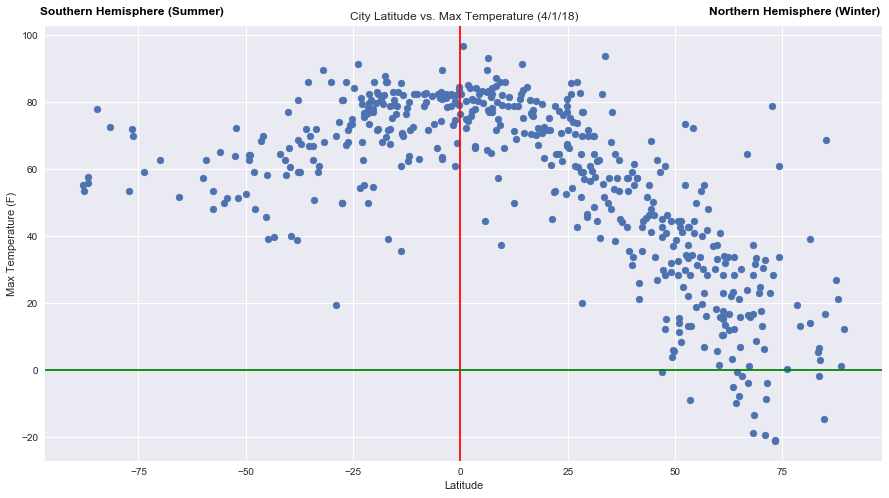

In [115]:
import seaborn as sns

sns.set()
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(latitude,temperature)

plt.axvline(0, color='r')
plt.axhline(0, color='green')
plt.text(58, 106, "Northern Hemisphere (Winter)", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(-98, 106, "Southern Hemisphere (Summer)", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title(f"City Latitude vs. Max Temperature (4/1/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("latitude_vs_max_temperature.png")
plt.show()

### Latitude vs Humidity Plot

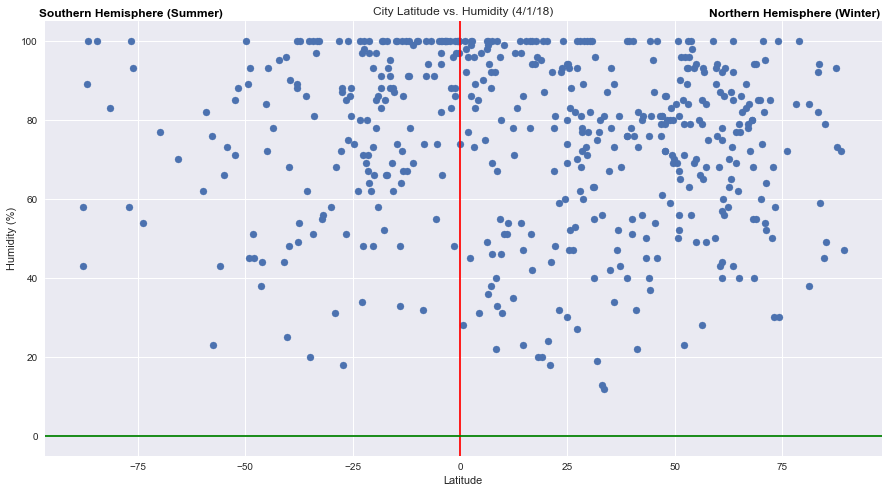

In [103]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(latitude,humidity)

plt.axvline(0, color='r')
plt.axhline(0, color='green')
plt.text(58, 106, "Northern Hemisphere (Winter)", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(-98, 106, "Southern Hemisphere (Summer)", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title(f"City Latitude vs. Humidity (4/1/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("city_latitude_vs_humidity.png")
plt.show()

### Latitude vs Cloudiness Plot

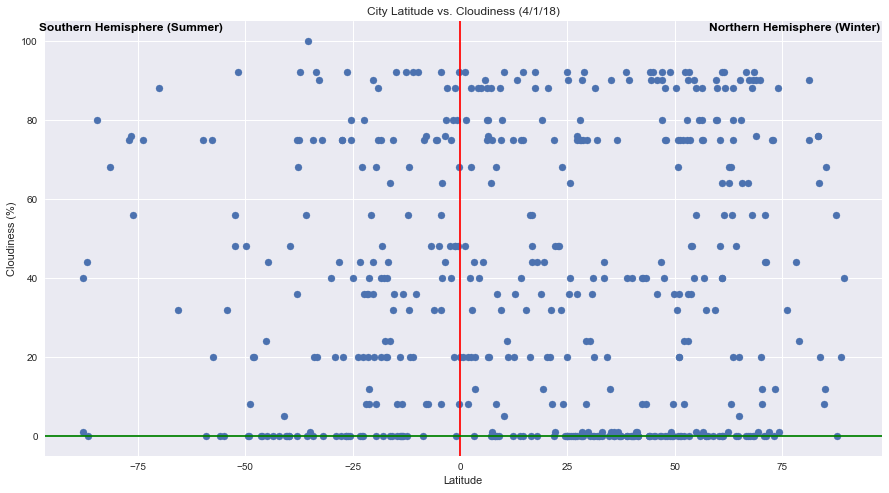

In [104]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(latitude,cloudiness)

plt.axvline(0, color='r')
plt.axhline(0, color='green')
plt.text(58, 102.5, "Northern Hemisphere (Winter)", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(-98, 102.5, "Southern Hemisphere (Summer)", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title(f"City Latitude vs. Cloudiness (4/1/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("city_latitude_vs_cloudiness.png")
plt.show()

### Latitude vs Wind Speed Plot

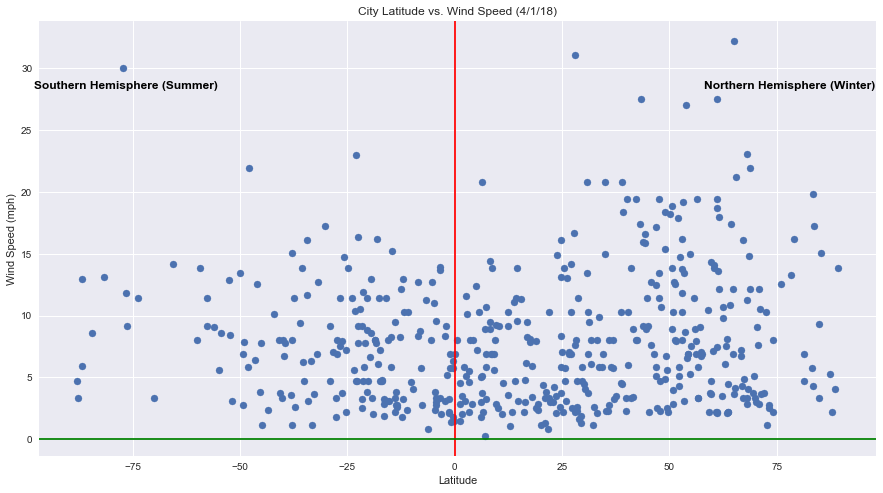

In [105]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(latitude,wind_speed)

plt.axvline(0, color='r')
plt.axhline(0, color='green')
plt.text(58, 28.3, "Northern Hemisphere (Winter)", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(-98, 28.3, "Southern Hemisphere (Summer)", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title(f"City Latitude vs. Wind Speed (4/1/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("city_latitude_vs_windspeed.png")
plt.show()

In [106]:
df.to_csv("WeatherPy.csv", index=True)